In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Flatten, SeparableConv2D
from tensorflow.keras.layers import Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf. __version__) 

2.6.4


In [2]:
callbacks_list = [
    ReduceLROnPlateau(monitor='val_accuracy',
                      factor=0.1,
                      patience=10,
                      min_lr=0.00001),
    EarlyStopping(monitor='val_accuracy',
                  min_delta=0.0001,
                  patience=20,
                  verbose=1,
                  mode='auto',
                  baseline=None,
                  restore_best_weights=True),              
]

In [3]:
def fit_model(epochs_qantity):
    hystory = model.fit(
        datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
        epochs=epochs_qantity,
        validation_data=(x_val, y_val),
        steps_per_epoch=x_train.shape[0] // BATCH_SIZE,
        callbacks=callbacks_list,
        verbose=1)

    return(hystory)    

In [4]:
def show_history_graph(history):    
    plt.figure(figsize=(20,12))
    plt.plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
    plt.plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
    
    average_data = calculate_average(history.history['val_accuracy'])
    plt.plot(average_data, 
            label=("Скользящее среднее от верных ответов на проверочном наборе"), linewidth=4)

    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()
    plt.grid()
    plt.show()

In [5]:
def model_fit_show(epochs):
    show_history_graph(fit_model(epochs))

In [6]:
def calculate_average(data):
    window_size = len(data) // 5        

    average_data = pd.Series(data)
    average_data = average_data.rolling(window=window_size).mean()

    return(average_data)    

In [7]:
def model_fit_show(epochs):
    show_history_graph(fit_model(epochs))

In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [9]:
!touch ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

touch: cannot touch '/root/.kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
TRAIN_PATH = '/content/digit_recognizer_data_folder'
BATCH_SIZE = 16
IMG_WIDTH = 28
IMG_HEIGHT = 28

In [11]:
train_dataset = np.loadtxt('/kaggle/input/digit-recognizer/train.csv', skiprows=1, delimiter=',')

In [12]:
train_dataset[:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
x_train_org = train_dataset[:, 1:]
x_train_org = x_train_org.reshape(x_train_org.shape[0], IMG_HEIGHT, IMG_WIDTH, 1)
x_train_org/=255
x_train_org[1].shape

(28, 28, 1)

In [14]:
y_train_org = train_dataset[:, 0]
y_train_org[:20]

array([1., 0., 1., 4., 0., 0., 7., 3., 5., 3., 8., 9., 1., 3., 3., 1., 2.,
       0., 7., 5.])

In [15]:
y_train_org = to_categorical(y_train_org)
print(y_train_org.shape)
y_train_org[:5]

(42000, 10)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
random_seed = 7
x_train, x_val, y_train, y_val = train_test_split(x_train_org, y_train_org, test_size=0.1, random_state=random_seed, stratify=y_train_org)

In [17]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.1
)

In [18]:
CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.85,
    axis=-1,
    reduction="auto",
    name="categorical_crossentropy",
)

In [21]:
model = Sequential()

model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model.add(GlobalMaxPooling2D())
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

Epoch 1/200
2362/2362 [==============================] - 23s 9ms/step - loss: 0.6288 - accuracy: 0.9039 - val_loss: 0.3855 - val_accuracy: 0.9619
Epoch 2/200
2362/2362 [==============================] - 22s 9ms/step - loss: 0.3257 - accuracy: 0.9594 - val_loss: 0.1830 - val_accuracy: 0.9748
Epoch 3/200
2362/2362 [==============================] - 22s 9ms/step - loss: 0.2094 - accuracy: 0.9694 - val_loss: 0.1189 - val_accuracy: 0.9836
Epoch 4/200
2362/2362 [==============================] - 21s 9ms/step - loss: 0.1496 - accuracy: 0.9744 - val_loss: 0.1112 - val_accuracy: 0.9833
Epoch 5/200
2362/2362 [==============================] - 22s 9ms/step - loss: 0.1031 - accuracy: 0.9789 - val_loss: 0.0843 - val_accuracy: 0.9826
Epoch 6/200
2362/2362 [==============================] - 22s 9ms/step - loss: 0.0887 - accuracy: 0.9806 - val_loss: 0.0700 - val_accuracy: 0.9855
Epoch 7/200
2362/2362 [==============================] - 22s 9ms/step - loss: 0.0637 - accuracy: 0.9836 - val_loss: 0.0519 -

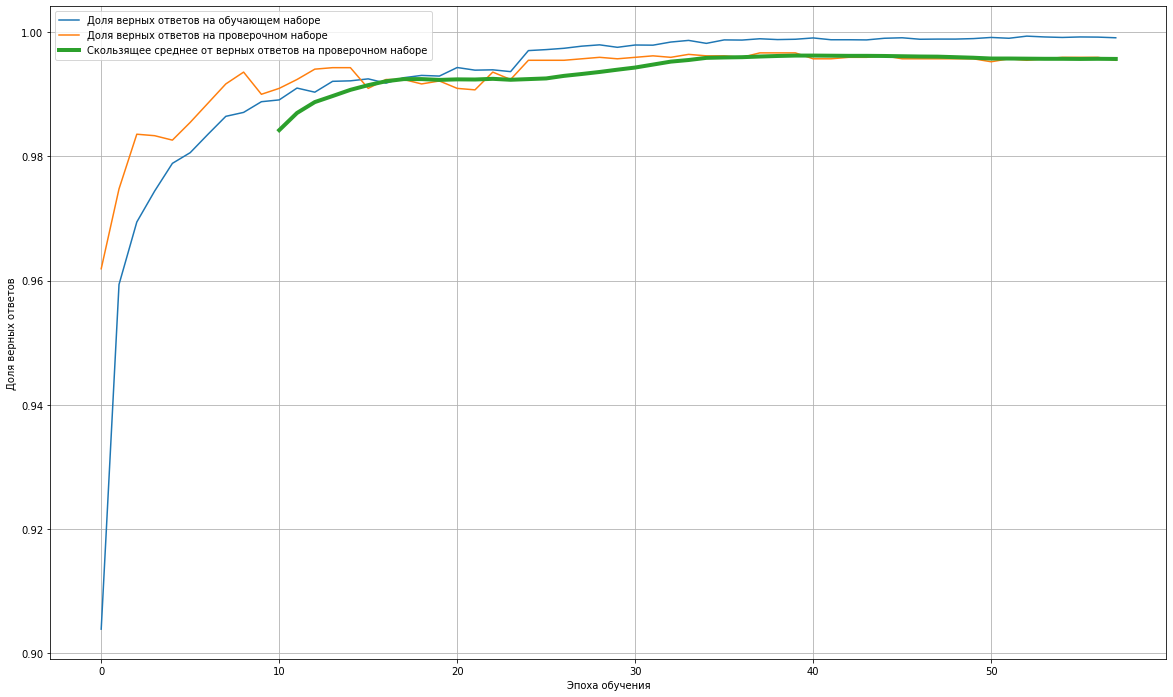

In [22]:
model_fit_show(200)

In [43]:
x_test = np.loadtxt('/kaggle/input/digit-recognizer/test.csv', skiprows=1, delimiter=",")

In [44]:
x_test = x_test.reshape(x_test.shape[0], IMG_HEIGHT, IMG_WIDTH, 1)

In [45]:
x_test = x_test / 255.0

In [53]:
predictions = model.predict(x_test)

In [54]:
predictions = np.argmax(predictions, axis=1)

In [55]:
out = np.column_stack((range(1, predictions.shape[0]+1), predictions))
out[:5]

array([[1, 2],
       [2, 0],
       [3, 9],
       [4, 0],
       [5, 3]])

In [56]:
np.savetxt('submission.csv', out, header="ImageId,Label", 
            comments="", fmt="%d,%d")

!head submission.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0


In [57]:
os.chdir(r'/kaggle/working')

In [58]:
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv

## Retraining model on validation split

In [52]:
def fit_model():
    hystory = model.fit(
        x_val, y_val, batch_size=BATCH_SIZE,
        epochs=1,                        
        verbose=1)

    return(hystory) 

fit_model()    

263/263 [==============================] - 2s 7ms/step - loss: 0.0253 - accuracy: 0.9914


In [32]:
model.save("./model5_dr_Conv2D.h5")